In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam

In [8]:
train_df = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_test.csv')
test_df = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')

In [9]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
train_data = np.array(train_df)
test_data = np.array(test_df)

In [11]:
x_train = train_data[:,1:]/255
y_train = train_data[:,0]

x_test= test_data[:,1:]/255
y_test=test_data[:,0]

In [23]:
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state=4)

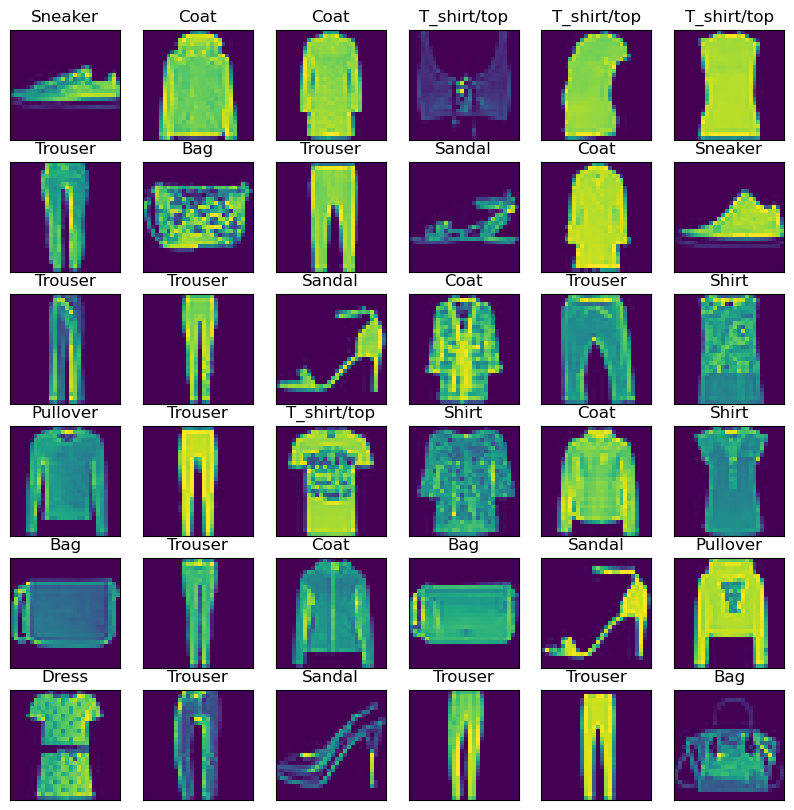

In [24]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

In [25]:
image_shape = (28,28,1)
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

In [26]:
import tensorflow as tf

# Define the model architecture 
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=image_shape),   
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),  
  tf.keras.layers.MaxPooling2D(2,2),   
  tf.keras.layers.Dropout(0.5),    
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),  
  tf.keras.layers.Dense(10, activation='softmax')
])

# Add L2 regularization to Dense layers
model.layers[6].kernel_regularizer = tf.keras.regularizers.l2(0.001)  
model.layers[7].kernel_regularizer = tf.keras.regularizers.l2(0.001)

# Increase dropout rate           
model.layers[4].rate = 0.7

In [27]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.01),
              metrics=['acc'])

In [28]:
# Add early stopping            
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(x_train,y_train,epochs=100,  
                     validation_data=(x_validate,y_validate),
                     callbacks=[early_stop])

Epoch 1/100
200/200 [==============================] - 5s 22ms/step - loss: 1.1936 - acc: 0.5562 - val_loss: 0.6711 - val_acc: 0.7481
Epoch 2/100
200/200 [==============================] - 4s 21ms/step - loss: 0.6951 - acc: 0.7380 - val_loss: 0.5791 - val_acc: 0.7869
Epoch 3/100
200/200 [==============================] - 5s 23ms/step - loss: 0.6348 - acc: 0.7630 - val_loss: 0.5458 - val_acc: 0.8087
Epoch 4/100
200/200 [==============================] - 4s 21ms/step - loss: 0.5796 - acc: 0.7788 - val_loss: 0.4979 - val_acc: 0.8138
Epoch 5/100
200/200 [==============================] - 4s 21ms/step - loss: 0.5555 - acc: 0.7856 - val_loss: 0.4725 - val_acc: 0.8388
Epoch 6/100
200/200 [==============================] - 4s 21ms/step - loss: 0.5332 - acc: 0.7978 - val_loss: 0.4756 - val_acc: 0.8400
Epoch 7/100
200/200 [==============================] - 4s 21ms/step - loss: 0.5167 - acc: 0.8058 - val_loss: 0.4819 - val_acc: 0.8206
Epoch 8/100
200/200 [==============================] - 4s 21ms

Text(0.5, 1.0, 'Train - Accuracy')

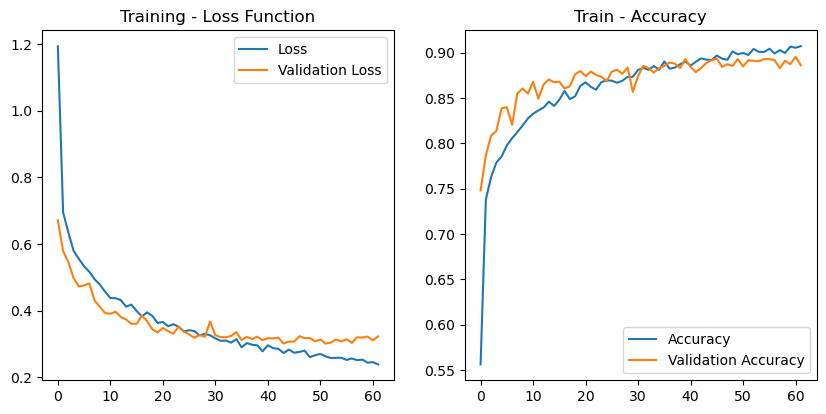

In [29]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['acc'], label='Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [30]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.3359
Test Accuracy : 0.8817


In [31]:
# Generate predictions
predicted = model.predict(x_test)
predicted_classes = np.argmax(predicted, axis=-1)

1875/1875 [==============================] - 10s 5ms/step


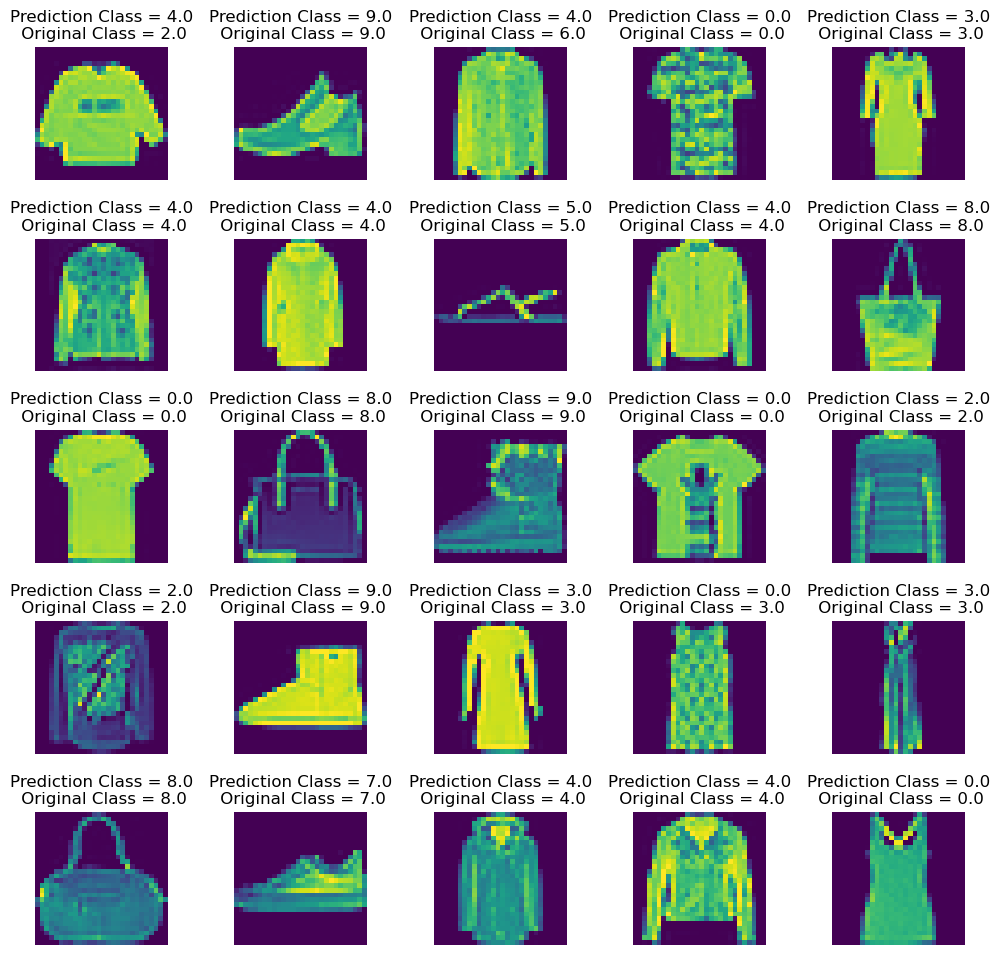

In [32]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W): 
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n Original Class = {y_test[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)